# ASSIGNMENT - 3

### Problem Statement
Recurrent neural network (RNN) - Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN.

In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [149]:
data=pd.read_csv("Google_Stock_Price_Train.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1379,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
1380,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
1381,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
1382,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [150]:
train = data.iloc[:1260,:]
test = data.iloc[1260:,:]

In [151]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100
1258,2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500


In [153]:
trainset = train.iloc[:,1:2].values

In [154]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1051.599976],
       [1046.719971],
       [1048.339966]])

In [155]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [156]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.9674549 ],
       [0.96072522],
       [0.96295924]])

In [157]:
x_train = []
y_train = []

In [158]:
for i in range(60,1125):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [159]:
x_train.shape

(1065, 60)

In [160]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [161]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [162]:
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [163]:
model.compile(optimizer = 'adam',loss = 'mse', metrics = ['mae'])

In [195]:
history = model.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
34/34 [==============================] - 5s 148ms/step - loss: 5.6109e-04 - mae: 0.0179 - val_loss: 2.1406e-04 - val_mae: 0.0103
Epoch 2/100
34/34 [==============================] - 4s 111ms/step - loss: 5.8639e-04 - mae: 0.0176 - val_loss: 2.0692e-04 - val_mae: 0.0097
Epoch 3/100
34/34 [==============================] - 4s 109ms/step - loss: 5.2944e-04 - mae: 0.0171 - val_loss: 1.9675e-04 - val_mae: 0.0095
Epoch 4/100
34/34 [==============================] - 4s 108ms/step - loss: 5.7206e-04 - mae: 0.0173 - val_loss: 2.2653e-04 - val_mae: 0.0105
Epoch 5/100
34/34 [==============================] - 4s 109ms/step - loss: 6.1592e-04 - mae: 0.0183 - val_loss: 3.2070e-04 - val_mae: 0.0138
Epoch 6/100
34/34 [==============================] - 4s 108ms/step - loss: 6.1284e-04 - mae: 0.0182 - val_loss: 4.8445e-04 - val_mae: 0.0175
Epoch 7/100
34/34 [==============================] - 4s 112ms/step - loss: 5.9028e-04 - mae: 0.0179 - val_loss: 2.8137e-04 - val_mae: 0.0123
Epoch 8/100
1

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [165]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
1260,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
1261,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
1262,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
1263,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
1264,2018-01-09,1109.400024,1110.569946,1101.230957,1106.260010,1106.260010,902500
...,...,...,...,...,...,...,...
1379,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
1380,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
1381,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
1382,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [167]:
real_stock_price = test.iloc[:,1:2].values

In [180]:
dataset_total = pd.concat((train['Open'],test['Open']),axis = 0)
dataset_total

0        357.385559
1        360.122742
2        362.313507
3        365.348755
4        365.393463
           ...     
1379    1143.599976
1380    1128.000000
1381    1121.339966
1382    1102.089966
1383    1120.000000
Name: Open, Length: 1384, dtype: float64

In [183]:
inputs = dataset_total[len(dataset_total) - len(test)-60:].values
inputs

array([ 966.700012,  980.      ,  980.      ,  973.719971,  987.450012,
        992.      ,  992.099976,  990.289978,  991.77002 ,  986.      ,
        989.440002,  989.52002 ,  970.      ,  968.369995,  980.      ,
       1009.190002, 1014.      , 1015.219971, 1017.210022, 1021.76001 ,
       1022.109985, 1028.98999 , 1027.27002 , 1030.52002 , 1033.98999 ,
       1026.459961, 1023.419983, 1022.590027, 1019.210022, 1022.52002 ,
       1034.01001 , 1020.26001 , 1023.309998, 1035.      , 1035.869995,
       1040.      , 1055.089966, 1042.680054, 1022.369995, 1015.799988,
       1012.659973,  995.940002, 1001.5     , 1020.429993, 1037.48999 ,
       1035.5     , 1039.630005, 1046.119995, 1045.      , 1054.609985,
       1066.079956, 1075.199951, 1071.780029, 1064.949951, 1061.109985,
       1058.069946, 1057.390015, 1051.599976, 1046.719971, 1048.339966,
       1064.310059, 1088.      , 1094.      , 1102.22998 , 1109.400024,
       1097.099976, 1106.300049, 1102.410034, 1132.51001 , 1126.

In [184]:
inputs = inputs.reshape(-1,1)

In [185]:
inputs

array([[ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [1037.48999 ],
       [10

In [186]:
inputs = sc.transform(inputs)
inputs.shape

(184, 1)

In [187]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [188]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [189]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [190]:
predicted_price = model.predict(x_test)

4/4 [==============================] - 0s 39ms/step


In [191]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1062.8075],
       [1065.9794],
       [1076.3673],
       [1089.3292],
       [1100.8851],
       [1109.4176],
       [1111.2684],
       [1110.8373],
       [1109.5304],
       [1115.1665],
       [1122.9597],
       [1130.2273],
       [1135.1185],
       [1138.7135],
       [1146.016 ],
       [1158.0012],
       [1168.1398],
       [1174.2896],
       [1177.0659],
       [1176.0265],
       [1174.4274],
       [1172.2117],
       [1161.9993],
       [1143.3982],
       [1112.8977],
       [1095.0009],
       [1087.4905],
       [1078.7715],
       [1075.48  ],
       [1076.0763],
       [1078.4478],
       [1086.3914],
       [1097.0786],
       [1105.5593],
       [1112.7003],
       [1119.1567],
       [1122.6788],
       [1126.659 ],
       [1133.3469],
       [1136.1   ],
       [1132.0908],
       [1114.2084],
       [1097.9202],
       [1094.7852],
       [1099.4028],
       [1111.2018],
       [1127.5729],
       [1147.0634],
       [1163.3595],
       [1166.8563],


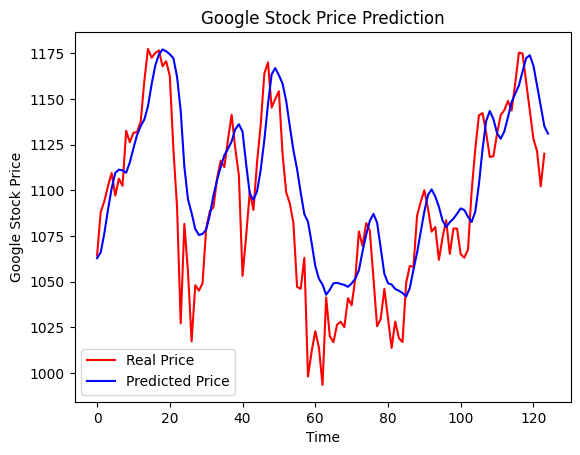

In [192]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()